In [2]:
import numpy as np

In [3]:
trainFeatures = np.load('D:/root/_temp/trainFeatures.npy')
#trainLabels = np.load('D:/root/_temp/trainLabels.npy')
#testFeatures = np.load('D:/root/_temp/testFeatures.npy')
#testLabels = np.load('D:/root/_temp/testLabels.npy')

# 모델

In [13]:
trainFeatures.shape

(357960, 28, 28, 3)

In [14]:
OUPUT_COUNT = 36 # = 26(a~z) + 10(0~9)

In [6]:
import tensorflow as tf

In [51]:
input = tf.keras.Input(shape=(28,28,3))

In [52]:
layer = tf.keras.layers.Conv2D(32, (3,3), padding="same", activation=tf.keras.activations.relu)(input)
layer = tf.keras.layers.MaxPool2D(pool_size=(2,2))(layer)

In [53]:
layer = tf.keras.layers.Conv2D(64, (3,3), activation=tf.keras.activations.relu)(layer)
layer = tf.keras.layers.MaxPool2D(pool_size=(2,2))(layer)

In [54]:
layer = tf.keras.layers.Conv2D(128, (3,3), activation=tf.keras.activations.relu)(layer)
layer = tf.keras.layers.MaxPool2D(pool_size=(2,2))(layer)
layer = tf.keras.layers.Dropout(rate=0.25)(layer)

In [55]:
layer = tf.keras.layers.Flatten()(layer)
layer = tf.keras.layers.Dense(128, activation=tf.keras.activations.relu)(layer)
layer = tf.keras.layers.Dropout(rate=0.2)(layer)

In [56]:
output = tf.keras.layers.Dense(OUPUT_COUNT, activation=tf.keras.activations.softmax)(layer)

In [57]:
model = tf.keras.models.Model(input, output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         7385

In [58]:
model.compile(
    optimizer=tf.keras.optimizers.Adam()
    ,loss=tf.keras.losses.SparseCategoricalCrossentropy()
    ,metrics=['accuracy']
)

In [ ]:
#trainFeatures = np.load('D:/root/_temp/trainFeatures.npy')
trainLabels = np.load('D:/root/_temp/trainLabels.npy')
#testFeatures = np.load('D:/root/_temp/testFeatures.npy')
#testLabels = np.load('D:/root/_temp/testLabels.npy')

In [59]:
history = model.fit(
    trainFeatures
    ,trainLabels
    ,batch_size=32
    ,epochs=30
    ,validation_split=0.1
)

Epoch 1/30
10068/10068 [==============================] - 242s 24ms/step - loss: 0.3836 - accuracy: 0.9047 - val_loss: 0.5462 - val_accuracy: 0.8097
Epoch 2/30
10068/10068 [==============================] - 253s 25ms/step - loss: 0.1748 - accuracy: 0.9521 - val_loss: 0.4381 - val_accuracy: 0.8476
Epoch 3/30
10068/10068 [==============================] - 263s 26ms/step - loss: 0.1636 - accuracy: 0.9559 - val_loss: 0.4021 - val_accuracy: 0.8692
Epoch 4/30
10068/10068 [==============================] - 269s 27ms/step - loss: 0.1567 - accuracy: 0.9581 - val_loss: 0.4008 - val_accuracy: 0.8739
Epoch 5/30
10068/10068 [==============================] - 266s 26ms/step - loss: 0.1515 - accuracy: 0.9592 - val_loss: 0.3702 - val_accuracy: 0.8838
Epoch 6/30
10068/10068 [==============================] - 267s 27ms/step - loss: 0.1507 - accuracy: 0.9595 - val_loss: 0.4123 - val_accuracy: 0.8778
Epoch 7/30
10068/10068 [==============================] - 266s 26ms/step - loss: 0.1492 - accuracy: 0.9604

In [67]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [49]:
import pandas as pd

<AxesSubplot:>

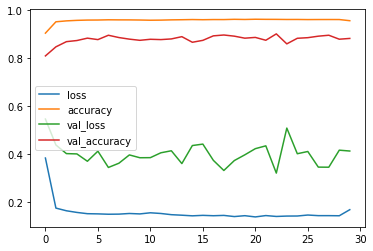

In [68]:
pd.DataFrame(history.history).plot.line()

In [60]:
model.save('ml_model/alphabet_and_number_size_28.h5')
#model = tf.keras.models.load_model('ml_model/alphabet_and_number_size_28.h5')

In [69]:
import jipsa

In [70]:
jipsa.saveTFLiteModel(model, 'ml_model/alphabet_and_number_size_28.tflite')

INFO:tensorflow:Assets written to: C:\Users\jiips\AppData\Local\Temp\tmpgne4o1kq\assets
